<a href="https://colab.research.google.com/github/Lotfullah21/Algorithms_AI/blob/main/8_3_2Weight_Initialization_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We'll need the following libraries:


In [75]:
# Import the libraries we need to use in this lab

# Using the following line code to install the torchvision library
# !mamba install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

In [76]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import numpy as np
torch.manual_seed(0)

### 1. Defining the neural network
#### 2. xavier initialization


In [77]:
class Xavier_Network(nn.Module):

  def __init__(self, Layers):
    super(Xavier_Network, self).__init__()
    self.hidden = nn.ModuleList()

    for input, output in zip(Layers,Layers[1:]):
      linear = nn.Linear(input,output)
      torch.nn.init.xavier_uniform_(linear.weight)
      self.hidden.append(linear)
  
  def forward(self,x):
    L = len(self.hidden)
    for (l, linear_transform) in zip(range(L),self.hidden):
      if l < L-1:
        x = torch.tanh(linear_transform(x))
      else:
        x = linear_transform(x)
    return x


#### 2. uniform initialization


In [78]:
# Define the neural network with Uniform initialization
class Uniform_Network(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Uniform_Network, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

#### 4. default initialization

In [79]:
# Define the neural network with Default initialization

class Network(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Network, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

### 3. Define training function

In [80]:
def train_model(model, criterion, train_loader, validation_loader, optimizer, epochs=200):
  i = 0
  loss_data = {'training_loss':[], 'validation_accuracy':[]}
  
  for epoch in range(epochs):
    for i,(x,y) in enumerate(train_loader):
      optimizer.zero_grad()
      z = model(x.view(-1,28*28))
      Loss = criterion(z,y)
      Loss.backward()
      optimizer.step()
      loss_data['training_loss'].append(Loss.data.item())
    
    correct = 0
    for x,y in validation_loader:
      y_hat = model(x.view(-1,28*28))
      ran, label = torch.max(y_hat, 1)
      correct = correct + (label == y ).sum().item()
    accuracy = 100*(correct/ len(validation_dataset))
    loss_data['validation_accuracy'].append(accuracy)

  return loss_data

### 4. Create train and validation dataset

In [81]:
training_dataset = dsets.MNIST(root = './data', train = True, download = True, transform = transforms.ToTensor())
validation_dataset = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor())

### 5. Create train and validation data loader

In [82]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=4000, shuffle=False)

### 5. Defining the loss function and layers

In [83]:
criterion = nn.CrossEntropyLoss()
input_dim  = 28*28
output_dim = 15
layers = [input_dim, 100, 10, 100, 10, 100,output_dim]
epochs = 15

### 6. Training the model

In [84]:
model = Network(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training_results = train_model(model, criterion, train_loader, validation_loader, optimizer, epochs = epochs)

In [85]:
# Train the model with Xavier initialization

Xavier_model = Xavier_Network(layers)
optimizer = torch.optim.SGD(Xavier_model.parameters(), lr=learning_rate)
training_results_Xavier = train_model(Xavier_model, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

In [86]:
# Train the model with Uniform initialization

Uniform_model = Uniform_Network(layers)
optimizer = torch.optim.SGD(Uniform_model.parameters(), lr=learning_rate)
training_results_Uniform = train_model(Uniform_model, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

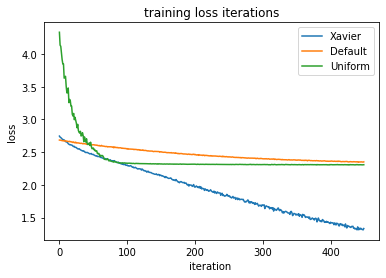

In [87]:
# Plot the loss of all models

plt.plot(training_results_Xavier['training_loss'], label='Xavier')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')  
plt.title('training loss iterations')
plt.legend()

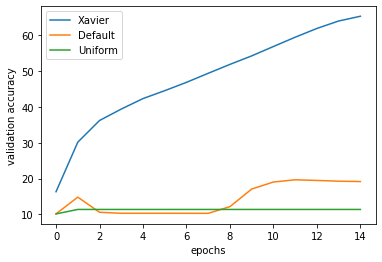

In [88]:
# Plot the accuracy of all models
# vali

plt.plot(training_results_Xavier['validation_accuracy'], label='Xavier')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs')   
plt.legend()

<!--Empty Space for separating topics-->
